(array([ 1.,  0.,  1.,  7., 21., 32., 18., 15.,  4.,  1.]),
 array([-8.26017133, -6.80620531, -5.35223928, -3.89827325, -2.44430723,
        -0.9903412 ,  0.46362483,  1.91759085,  3.37155688,  4.82552291,
         6.27948893]),
 <BarContainer object of 10 artists>)

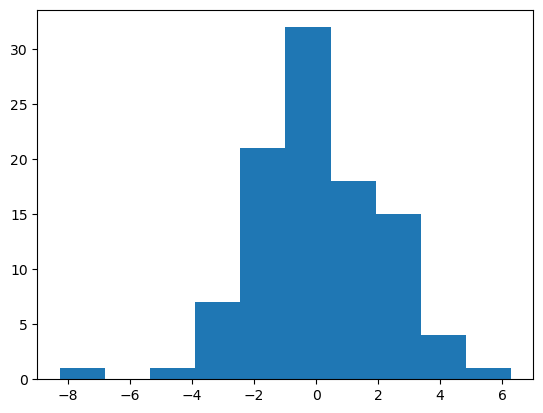

In [174]:
# rerunning main.ipynb using our own dataset
import matplotlib.pyplot as plt
import numpy as np
import random

mu = 0
sigma = 2.3
num_samples = 100

rng = np.random.default_rng()
sample_differences = rng.normal(loc=mu, scale=sigma, size=num_samples)

plt.hist(sample_differences)

actual function: y = 5.209287464750074 + 1.656874188417248x


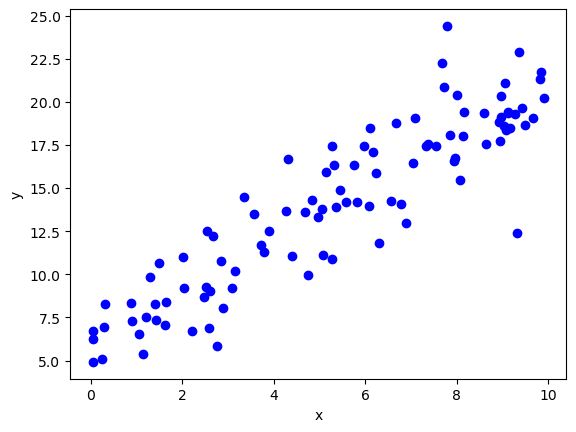

In [175]:
# creating scatter plot of our dataset
# trying to model y = 4.5 + 2.3x for x in [0, 10]

actual_a = np.random.normal(loc=5, scale=1.2, size=1)
actual_b = np.random.normal(loc=0, scale=2.3, size=1)
actual = lambda x: actual_a[0] + (actual_b[0] * x)

print(f'actual function: y = {float(actual_a)} + {float(actual_b)}x')

df_x = [random.uniform(0, 10) for i in range(num_samples)]
df_y = [actual(df_x[i]) + sample_differences[i] for i in range(num_samples)]

plt.scatter(df_x, df_y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [176]:
params = [10, 0]
pred = lambda x: params[0] + (params[1] * x)

print(pred(2))

def sum_residuals(multipliers = [1 for i in range(len(df_x))]):
    sum_error = 0

    for i in range(len(df_x)):
        sum_error += (df_y[i] - pred(df_x[i]))*multipliers[i]

    return sum_error

print(sum_residuals())

10
407.62068739060607


In [177]:
def loss_function(n = len(df_x)):
    sum_squared = 0

    for i in range(n):
        residual = (df_y[i] - pred(df_x[i]))**2
        sum_squared += residual

    return sum_squared

print(loss_function())

4055.9327529901743


In [178]:
alpha = 0.0002
epochs = 500

def simulation():
    results = {
        'run_num': [0],
        'total_error': [loss_function()]
    }

    for i in range(epochs):
        params[0] += 2 * alpha * sum_residuals()
        params[1] += 2 * alpha * sum_residuals(df_x)

        new_data = {
            'run_num': i + 1,
            'total_error': loss_function()
        }

        # print(f'new_data = {new_data}')

        results['run_num'].append(new_data['run_num'])
        results['total_error'].append(new_data['total_error'])

    return results

In [179]:
results = simulation()

print(params)

[6.144274485583137, 1.485523109574189]


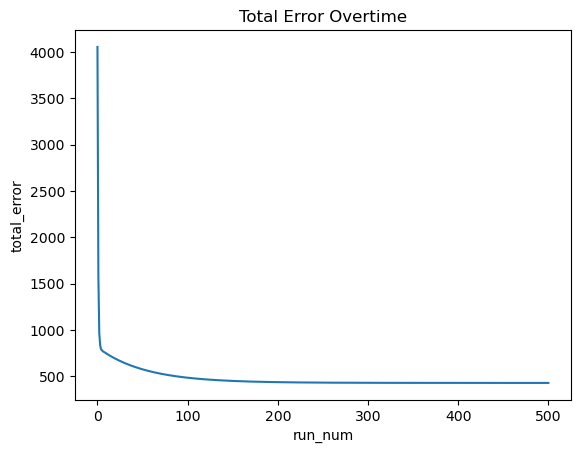

In [180]:
plt.plot(results['run_num'], results['total_error'])
plt.xlabel('run_num')
plt.ylabel('total_error')
plt.title('Total Error Overtime')

plt.show()

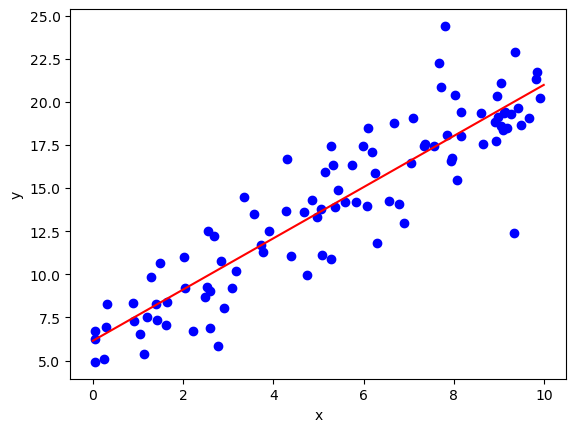

In [181]:
x_list = [x/100 for x in range(0, 1000)]
y_predict = [params[0] + (x * params[1]) for x in x_list]

plt.scatter(df_x, df_y, color='blue')
plt.plot(x_list, y_predict, color='red', label='age regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('')

plt.show()

[18.371558216178126, 17.45367105885955, 19.07641582317895, 10.784839526286497, 17.53678975037704, 6.514734485785003, 13.343805329097151, 20.879267298584587, 19.296418021887835, 16.354826929695673, 24.406043087073456, 9.040423473781109, 20.23156062334699, 12.403136375097086, 17.436367121670898, 14.202314081433624, 18.834476928580653, 9.17853532734862, 14.28727698389091, 7.510927185763654, 16.580055280707885, 5.819971911787935, 10.88489081348298, 9.826558485543675, 8.265678874230028, 13.968765205714849, 11.711471458851547, 17.572022691415924, 18.01858488932388, 6.890685678705981, 20.35278203050722, 9.94677427895418, 13.663433088012502, 19.627185750186683, 19.376762408196353, 6.928348496604996, 18.778053240227457, 5.389082778753604, 18.472052691780352, 16.48222629700795, 14.238340856752144, 9.258647422124136, 18.10664266120091, 16.753027500302437, 8.368944119388821, 11.807710183939113, 19.32809975729366, 15.864195593400462, 9.230641146172703, 17.42095686880303, 7.337342129202675, 15.46076

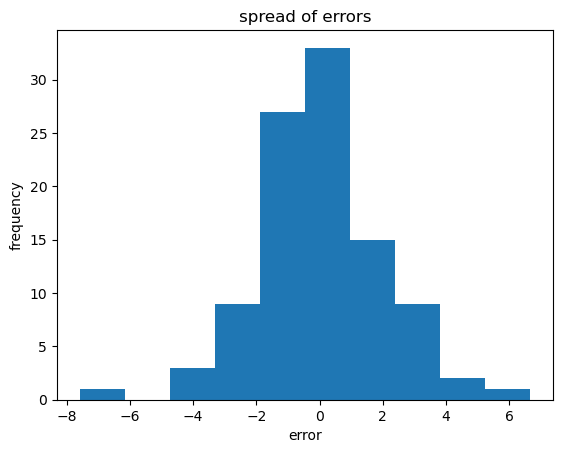

In [182]:
errors = [df_y[i] - pred(df_x[i]) for i in range(len(df_x))]

print(df_y)

plt.hist(errors)
plt.xlabel('error')
plt.ylabel('frequency')
plt.title('spread of errors')

plt.show()